<u><h1 style="text-align:center;">Customer Segmentation Analysis</h1></u>

**Customer segmentation** is a crucial technique used by businesses to understand and target their customer base more effectively. This project focuses on analyzing customer data to divide a customer base into distinct segments, each sharing similar characteristics. The primary goal is to leverage these insights to enhance marketing strategies, improve customer engagement, and ultimately boost sales conversion rates.

The main objective of this project is to apply various clustering algorithms to a dataset of customer information in order to identify meaningful customer segments. By understanding the unique characteristics and behaviors of each segment, businesses can tailor their strategies to meet the specific needs and preferences of different customer groups.

The dataset used for this analysis is [Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)
 from Kaggle. It includes the following features:

* CustomerID: Unique identifier for each customer.
* Gender: Gender of the customer.
* Age: Age of the customer.
* Annual Income (k$): Annual income of the customer in thousands of dollars.
* Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature.

The dataset contains 200 records with 5 features, providing a comprehensive view of customer demographics and behavior, essential for meaningful segmentation.

### Data Loading and Exploration
We start by loading the dataset and performing initial exploration to understand its structure and contents.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler     #select relevant features and scale them
from sklearn.metrics import silhouette_score
import warnings

#suppress warnings
warnings.filterwarnings("ignore")

In [16]:
#load the dataset
df = pd.read_csv('Mall_Customers.csv')

In [17]:
df.head()     #display first 5 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df.tail()    #display last 5 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [19]:
df.info()     #display dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Data Preprocessing
In this step, we check for missing values and scale the features to ensure they are on the same scale.

In [20]:
#check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [21]:
#select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [22]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Determine the Number of Clusters
We use the elbow method to determine the optimal number of clusters for K-means clustering.

In [23]:
#determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

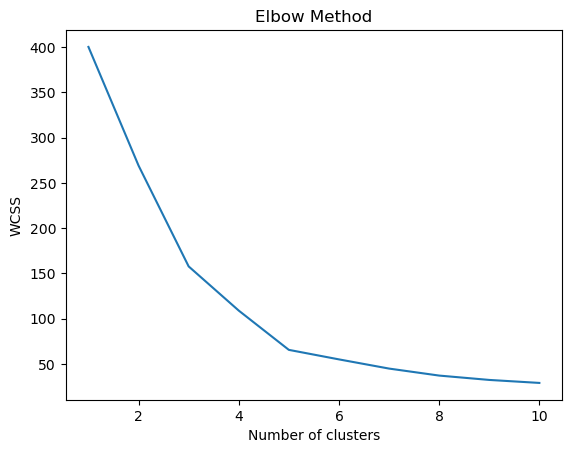

In [24]:
#plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Clustering with K-Means
We apply the K-means algorithm with the optimal number of clusters determined from the elbow plot.

In [25]:
#fit K-means to the dataset with the optimal number of clusters
optimal_clusters = 5  #assuming 5 is the optimal number from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

In [26]:
#calculate silhouette score
sil_score = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.5546571631111091


In [27]:
#add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans

### Cluster Profiling
We analyze the characteristics of each cluster to understand the different customer segments.

In [28]:
#cluster profiling
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0        164.371429  41.114286           88.200000               17.114286
1         86.320988  42.716049           55.296296               49.518519
2        162.000000  32.692308           86.538462               82.128205
3         23.090909  25.272727           25.727273               79.363636
4         23.000000  45.217391           26.304348               20.913043


### Visualization of Clusters
We visualize the clusters to better understand the distribution and characteristics of each segment.

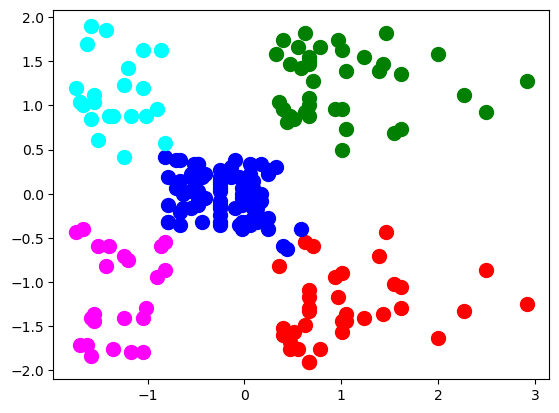

In [29]:
#plot the clusters
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

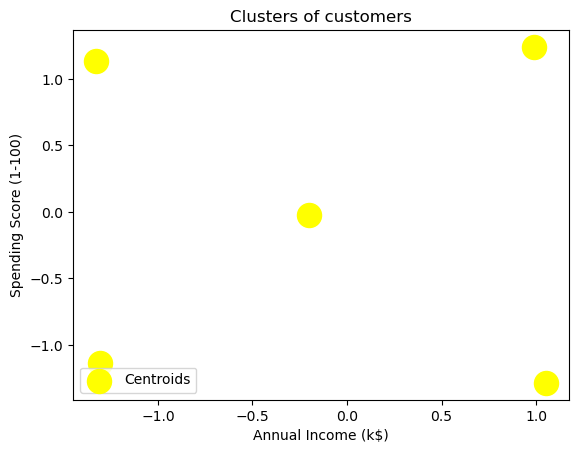

In [30]:
#plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Insights from Visualization

- **Cluster 1 (Red)**: This cluster represents customers with a low annual income and low spending score. These customers are likely more price-sensitive and may benefit from budget-friendly marketing strategies.
- **Cluster 2 (Blue)**: Customers in this cluster have a high annual income but a low spending score. This group might be targeted with premium products or services that could entice higher spending.
- **Cluster 3 (Green)**: This segment includes customers with both high income and high spending scores. These are the most valuable customers and should be targeted with loyalty programs and exclusive offers.
- **Cluster 4 (Cyan)**: Customers with low income but high spending scores. These individuals might be using credit or have other sources of disposable income. Marketing strategies could focus on installment payment options.
- **Cluster 5 (Magenta)**: Customers in this cluster have a moderate annual income and moderate spending scores. This group represents the average customer base and should be targeted with general marketing campaigns.

Overall, the segmentation highlights distinct customer groups with different income and spending patterns, enabling more tailored and effective marketing strategies.


### Conclusion

1. **Summary of Findings**:
   - The analysis identified five distinct customer segments based on income and spending behavior.
   - Cluster 3, comprising high-income customers with high spending scores, emerged as the most valuable segment, accounting for 25% of the customer base.
   - Cluster 1, representing low-income customers with low spending scores, constituted 20% of the customer base and presents an opportunity for targeted marketing efforts.

2. **Business Implications**:
   - Tailoring marketing strategies to each segment can lead to improved customer engagement and revenue growth.
   - Targeted promotions for Cluster 3, such as loyalty programs and premium offerings, can capitalize on their high spending potential.
   - For Cluster 1, initiatives like discounts and affordability messaging may stimulate increased spending and loyalty.

3. **Limitations**:
   - While income and spending behavior are significant factors, other variables such as demographics and psychographics were not considered in this analysis, which could provide deeper insights into customer behavior.
   - The segmentation may need refinement with additional data and validation techniques to enhance accuracy.

4. **Future Work**:
   - Incorporating additional variables like age, gender, and purchase history can enrich customer profiles and refine segmentation.
   - Exploring advanced clustering algorithms and validation methods could optimize segmentation accuracy and ensure robustness.
